In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


# Datasets

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Taiwanese Bankruptcy Prediction

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# data (as pandas dataframes) 
X_taiwan = taiwanese_bankruptcy_prediction.data.features 
y_taiwan = taiwanese_bankruptcy_prediction.data.targets 
  
# metadata 
print(taiwanese_bankruptcy_prediction.metadata) 
  
# variable information 
print(taiwanese_bankruptcy_prediction.variables) 

{'uci_id': 572, 'name': 'Taiwanese Bankruptcy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/572/data.csv', 'abstract': 'The data were collected from the Taiwan Economic Journal  for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6819, 'num_features': 95, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Bankrupt?'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5004D', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': Non

## Breast Cancer Coimbra

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 
  
# data (as pandas dataframes) 
X_cancer = breast_cancer_coimbra.data.features 
y_cancer = breast_cancer_coimbra.data.targets 
  
# metadata 
print(breast_cancer_coimbra.metadata) 
  
# variable information 
print(breast_cancer_coimbra.variables) 

{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intro_paper': {'ID': 431, 'type': 'NATIVE', 'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer', 'authors': 'M.

## Website Phishing

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
website_phishing = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
X_website = website_phishing.data.features 
y_website = website_phishing.data.targets 
  
# metadata 
print(website_phishing.metadata) 
  
# variable information 
print(website_phishing.variables)

{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'ID': 440, 'type': 'NATIVE', 'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'venue': 'Expert systems with applications', 'year': 2014, 'journal': None, 'DOI': '10.1016/j.eswa.2014.03.019', 'URL': 'https://www.semanticscholar.org/paper/867e2293e9780b729705b4ba48d6b1

# Classifier Function

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


class ClassifierRunner:
    def __init__(self, model, param_grid, split_ratios=None):
        self.model = model
        self.param_grid = param_grid
        self.split_ratios = split_ratios or {"20/80": 0.8, "50/50": 0.5, "80/20": 0.2}
        self.results = []

    def split_data(self, X, y):
        splits = {}
        for ratio_name, test_size in self.split_ratios.items():
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, stratify=y)
            splits[ratio_name] = (X_train, X_test, y_train, y_test)
        return splits

    def optimize_hyperparameters(self, X, y):
        grid = GridSearchCV(self.model, self.param_grid, cv=5, scoring="accuracy")
        grid.fit(X, y)
        print(f"Best Parameters: {grid.best_params_}")
        return grid.best_params_

    def evaluate_model(self, X_train, X_test, y_train, y_test, best_params):
        self.model.set_params(**best_params)
        self.model.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, self.model.predict(X_train))
        test_acc = accuracy_score(y_test, self.model.predict(X_test))
        return {"Training Accuracy": train_acc, "Testing Accuracy": test_acc}

    def run(self, datasets, classifier_name):
        for dataset_name, (X, y) in datasets.items():
            print(f"Processing {dataset_name} with {classifier_name}...")
            data_splits = self.split_data(X, y)
            best_params = self.optimize_hyperparameters(X, y)

            for split_name, (X_train, X_test, y_train, y_test) in data_splits.items():
                eval_result = self.evaluate_model(X_train, X_test, y_train, y_test, best_params)
                eval_result.update({"Dataset": dataset_name, "Partition": split_name, "Model": classifier_name})
                self.results.append(eval_result)

        self.save_results(classifier_name)

    def save_results(self, classifier_name):
        results_df = pd.DataFrame(self.results)
        results_df.to_csv(f"{classifier_name}_results.csv", index=False)
        print(results_df)

In [89]:
datasets = {
    "Taiwan": (X_taiwan, y_taiwan),
    "Cancer": (X_cancer, y_cancer),
    "Website": (X_website, y_website)
}


## KNN Classifier

In [38]:
def run_knn():
    knn_runner = ClassifierRunner(
        model=KNeighborsClassifier(),
        param_grid={"n_neighbors": [3, 5, 10], "metric": ["euclidean", "manhattan"]}
    )
    knn_runner.run(datasets, "k-NN")

## Logisitc Regression Classifier

In [39]:
def run_logistic_regression():
    lr_runner = ClassifierRunner(
        model=LogisticRegression(max_iter=1000, random_state=42),
        param_grid={"C": [0.01, 0.1, 1, 10, 100], "solver": ["lbfgs", "liblinear"]}
    )
    lr_runner.run(datasets, "Logistic Regression")



## ANN Classifier

In [40]:
def run_ann():
    ann_runner = ClassifierRunner(
        model=MLPClassifier(max_iter=500, random_state=42),
        param_grid={
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "solver": ["adam", "sgd"]
        }
    )
    ann_runner.run(datasets, "ANN")

# 1st Trial

In [46]:
if __name__ == "__main__":
    knn1 = run_knn()
    lr1 = run_logistic_regression()
    ann1 = run_ann()

Processing Taiwan with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Processing Cancer with k-NN...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}
Processing Website with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.967718          0.967742   Taiwan     20/80  k-NN
1           0.967732          0.967742   Taiwan     50/50  k-NN
2           0.967736          0.967742   Taiwan     80/20  k-NN
3           0.608696          0.473118   Cancer     20/80  k-NN
4           0.672414          0.482759   Cancer     50/50  k-NN
5           0.597826          0.750000   Cancer     80/20  k-NN
6           0.900000          0.821791  Website     20/80  k-NN
7           0.912722          0.861152  Website     50/50  k-NN
8           0.932532          0.848708  Website     80/20  k-NN
Processing Taiwan with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Processing Website with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 100, 'solver': 'liblinear'}
   Training Accuracy  Testing Accuracy  Dataset Partition                Model
0           0.968452          0.964626   Taiwan     20/80  Logistic Regression
1           0.967732          0.967449   Taiwan     50/50  Logistic Regression
2           0.960770          0.956012   Taiwan     80/20  Logistic Regression
3           0.782609          0.559140   Cancer     20/80  Logistic Regression
4           0.758621          0.672414   Cancer     50/50  Logistic Regression
5           0.728261          0.750000   Cancer     80/20  Logistic Regression
6           0.866667          0.829178  Website     20/80  Logistic Regression
7           0.850592          0.797637  Website     50/50  Logistic Regression
8           0.841035          0.811808  Website     80/20  Logistic Regression
Processing Taiwan with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neur

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversi

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

Processing Website with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.967718          0.967742   Taiwan     20/80   ANN
1           0.967732          0.967449   Taiwan     50/50   ANN
2           0.967736          0.967742   Taiwan     80/20   ANN
3           1.000000          0.731183   Cancer     20/80   ANN
4           1.000000          0.793103   Cancer     50/50   ANN
5           0.978261          0.833333   Cancer     80/20   ANN
6           0.951852          0.825485  Website     20/80   ANN
7           0.948225          0.859675  Website     50/50   ANN
8           0.935305          0.874539  Website     80/20   ANN


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# 2nd Trial

In [47]:
if __name__ == "__main__":
    knn2= run_knn()
    lr2 = run_logistic_regression()
    ann2 = run_ann()

Processing Taiwan with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Processing Cancer with k-NN...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}
Processing Website with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.967718          0.967742   Taiwan     20/80  k-NN
1           0.967732          0.967742   Taiwan     50/50  k-NN
2           0.967736          0.967742   Taiwan     80/20  k-NN
3           0.608696          0.483871   Cancer     20/80  k-NN
4           0.655172          0.500000   Cancer     50/50  k-NN
5           0.695652          0.583333   Cancer     80/20  k-NN
6           0.892593          0.821791  Website     20/80  k-NN
7           0.914201          0.856721  Website     50/50  k-NN
8           0.913124          0.926199  Website     80/20  k-NN
Processing Taiwan with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Processing Website with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 100, 'solver': 'liblinear'}
   Training Accuracy  Testing Accuracy  Dataset Partition                Model
0           0.966251          0.964443   Taiwan     20/80  Logistic Regression
1           0.968026          0.966862   Taiwan     50/50  Logistic Regression
2           0.966086          0.963343   Taiwan     80/20  Logistic Regression
3           0.739130          0.645161   Cancer     20/80  Logistic Regression
4           0.810345          0.689655   Cancer     50/50  Logistic Regression
5           0.782609          0.875000   Cancer     80/20  Logistic Regression
6           0.848148          0.831025  Website     20/80  Logistic Regression
7           0.831361          0.843427  Website     50/50  Logistic Regression
8           0.832717          0.830258  Website     80/20  Logistic Regression
Processing Taiwan with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neur

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversi

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Website with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.967718          0.967742   Taiwan     20/80   ANN
1           0.967732          0.967449   Taiwan     50/50   ANN
2           0.967736          0.967742   Taiwan     80/20   ANN
3           1.000000          0.591398   Cancer     20/80   ANN
4           1.000000          0.689655   Cancer     50/50   ANN
5           0.934783          0.750000   Cancer     80/20   ANN
6           0.966667          0.819021  Website     20/80   ANN
7           0.940828          0.896603  Website     50/50   ANN
8           0.939002          0.889299  Website     80/20   ANN


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# 3rd Trial

In [48]:
if __name__ == "__main__":
    knn3 = run_knn()
    lr3 = run_logistic_regression()
    ann3 = run_ann()

Processing Taiwan with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Processing Cancer with k-NN...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}
Processing Website with k-NN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.967718          0.967742   Taiwan     20/80  k-NN
1           0.967732          0.967742   Taiwan     50/50  k-NN
2           0.967736          0.967742   Taiwan     80/20  k-NN
3           0.608696          0.462366   Cancer     20/80  k-NN
4           0.672414          0.568966   Cancer     50/50  k-NN
5           0.663043          0.416667   Cancer     80/20  k-NN
6           0.859259          0.833795  Website     20/80  k-NN
7           0.905325          0.870015  Website     50/50  k-NN
8           0.914048          0.863469  Website     80/20  k-NN
Processing Taiwan with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Processing Website with Logistic Regression...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y 

Best Parameters: {'C': 100, 'solver': 'liblinear'}
   Training Accuracy  Testing Accuracy  Dataset Partition                Model
0           0.958914          0.959677   Taiwan     20/80  Logistic Regression
1           0.967146          0.965396   Taiwan     50/50  Logistic Regression
2           0.965720          0.967009   Taiwan     80/20  Logistic Regression
3           0.869565          0.763441   Cancer     20/80  Logistic Regression
4           0.758621          0.655172   Cancer     50/50  Logistic Regression
5           0.782609          0.791667   Cancer     80/20  Logistic Regression
6           0.837037          0.828255  Website     20/80  Logistic Regression
7           0.840237          0.831610  Website     50/50  Logistic Regression
8           0.841035          0.837638  Website     80/20  Logistic Regression
Processing Taiwan with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neur

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing Cancer with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversi

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

Processing Website with ANN...


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array

   Training Accuracy  Testing Accuracy  Dataset Partition Model
0           0.032282          0.032258   Taiwan     20/80   ANN
1           0.967732          0.967742   Taiwan     50/50   ANN
2           0.967736          0.967742   Taiwan     80/20   ANN
3           1.000000          0.731183   Cancer     20/80   ANN
4           1.000000          0.620690   Cancer     50/50   ANN
5           0.967391          0.791667   Cancer     80/20   ANN
6           0.944444          0.843029  Website     20/80   ANN
7           0.940828          0.889217  Website     50/50   ANN
8           0.940850          0.889299  Website     80/20   ANN


/Users/drew/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
print(knn3)

None


In [52]:
ann_1 = pd.read_csv(r"ANN_results1.csv")
ann_1['Trial'] = 'Trial 1'
ann_2 = pd.read_csv(r"ANN_results2.csv")
ann_2['Trial'] = 'Trial 2'
ann_3 = pd.read_csv(r"ANN_results3.csv")
ann_3['Trial'] = 'Trial 3'
knn_1 = pd.read_csv(r"k-NN_results1.csv")
knn_1['Trial'] = 'Trial 1'
knn_2 = pd.read_csv(r"k-NN_results2.csv")
knn_2['Trial'] = 'Trial 2'
knn_3 = pd.read_csv(r"k-NN_results3.csv")
knn_3['Trial'] = 'Trial 3'
lr_1 = pd.read_csv(r"Logistic Regression_results1.csv")
lr_1['Trial'] = 'Trial 1'
lr_2 = pd.read_csv(r"Logistic Regression_results2.csv")
lr_2['Trial'] = 'Trial 2'
lr_3 = pd.read_csv(r"Logistic Regression_results3.csv")
lr_3['Trial'] = 'Trial 3'

In [53]:
df_array = [ann_1, ann_2, ann_3, knn_1, knn_2, knn_3, lr_1, lr_2, lr_3]
df_array

[   Training Accuracy  Testing Accuracy  Dataset Partition Model    Trial
 0           0.967718          0.967742   Taiwan     20/80   ANN  Trial 1
 1           0.967732          0.967449   Taiwan     50/50   ANN  Trial 1
 2           0.967736          0.967742   Taiwan     80/20   ANN  Trial 1
 3           1.000000          0.731183   Cancer     20/80   ANN  Trial 1
 4           1.000000          0.793103   Cancer     50/50   ANN  Trial 1
 5           0.978261          0.833333   Cancer     80/20   ANN  Trial 1
 6           0.951852          0.825485  Website     20/80   ANN  Trial 1
 7           0.948225          0.859675  Website     50/50   ANN  Trial 1
 8           0.935305          0.874539  Website     80/20   ANN  Trial 1,
    Training Accuracy  Testing Accuracy  Dataset Partition Model    Trial
 0           0.967718          0.967742   Taiwan     20/80   ANN  Trial 2
 1           0.967732          0.967449   Taiwan     50/50   ANN  Trial 2
 2           0.967736          0.9677

In [65]:
results_df = pd.DataFrame(columns = ann_1.columns)
for df in df_array:
    results_df = pd.concat([results_df, df])
results_df.to_csv(r'Concated_results.csv')
results_df


/var/folders/rx/k75cr7_j1xb_bgn3g99_wzvw0000gn/T/ipykernel_46213/1189334658.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, df])


,Training Accuracy,Testing Accuracy,Dataset,Partition,Model,Trial
0,0.967718,0.967742,Taiwan,20/80,ANN,Trial 1
1,0.967732,0.967449,Taiwan,50/50,ANN,Trial 1
2,0.967736,0.967742,Taiwan,80/20,ANN,Trial 1
3,1.000000,0.731183,Cancer,20/80,ANN,Trial 1
4,1.000000,0.793103,Cancer,50/50,ANN,Trial 1
...,...,...,...,...,...,...
4,0.758621,0.655172,Cancer,50/50,Logistic Regression,Trial 3
5,0.782609,0.791667,Cancer,80/20,Logistic Regression,Trial 3
6,0.837037,0.828255,Website,20/80,Logistic Regression,Trial 3
7,0.840237,0.831610,Website,50/50,Logistic Regression,Trial 3


In [58]:
results_df[['Model', 'Partition', 'Testing Accuracy']]

,Model,Partition,Testing Accuracy
0,ANN,20/80,0.967742
1,ANN,50/50,0.967449
2,ANN,80/20,0.967742
3,ANN,20/80,0.731183
4,ANN,50/50,0.793103
...,...,...,...
4,Logistic Regression,50/50,0.655172
5,Logistic Regression,80/20,0.791667
6,Logistic Regression,20/80,0.828255
7,Logistic Regression,50/50,0.831610


<Axes: xlabel='Partition', ylabel='Testing Accuracy'>

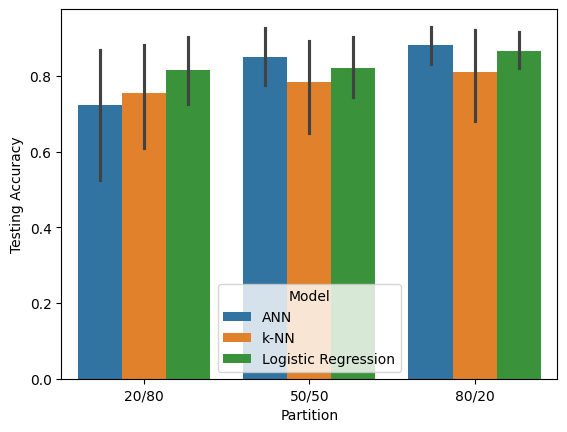

In [60]:
import seaborn as sns
sns.barplot(results_df[['Model', 'Partition', 'Testing Accuracy']], x = 'Partition', y = 'Testing Accuracy', hue = 'Model')

In [82]:
results_df[['Model', 'Testing Accuracy']].groupby('Model').mean()

,Testing Accuracy
Model,
ANN,0.818222
Logistic Regression,0.833974
k-NN,0.782755


In [83]:
results_df

,Training Accuracy,Testing Accuracy,Dataset,Partition,Model,Trial
0,0.967718,0.967742,Taiwan,20/80,ANN,Trial 1
1,0.967732,0.967449,Taiwan,50/50,ANN,Trial 1
2,0.967736,0.967742,Taiwan,80/20,ANN,Trial 1
3,1.000000,0.731183,Cancer,20/80,ANN,Trial 1
4,1.000000,0.793103,Cancer,50/50,ANN,Trial 1
...,...,...,...,...,...,...
4,0.758621,0.655172,Cancer,50/50,Logistic Regression,Trial 3
5,0.782609,0.791667,Cancer,80/20,Logistic Regression,Trial 3
6,0.837037,0.828255,Website,20/80,Logistic Regression,Trial 3
7,0.840237,0.831610,Website,50/50,Logistic Regression,Trial 3


In [85]:
trial1_results = results_df[results_df['Trial'] == 'Trial 1']
trial2_results = results_df[results_df['Trial'] == 'Trial 2']
trial3_results = results_df[results_df['Trial'] == 'Trial 3']


# Trial 1 Results

In [86]:
trial1_results

,Training Accuracy,Testing Accuracy,Dataset,Partition,Model,Trial
0,0.967718,0.967742,Taiwan,20/80,ANN,Trial 1
1,0.967732,0.967449,Taiwan,50/50,ANN,Trial 1
2,0.967736,0.967742,Taiwan,80/20,ANN,Trial 1
3,1.000000,0.731183,Cancer,20/80,ANN,Trial 1
4,1.000000,0.793103,Cancer,50/50,ANN,Trial 1
5,0.978261,0.833333,Cancer,80/20,ANN,Trial 1
6,0.951852,0.825485,Website,20/80,ANN,Trial 1
7,0.948225,0.859675,Website,50/50,ANN,Trial 1
8,0.935305,0.874539,Website,80/20,ANN,Trial 1
0,0.967718,0.967742,Taiwan,20/80,k-NN,Trial 1


# Trial 2 Results

In [87]:
trial2_results

,Training Accuracy,Testing Accuracy,Dataset,Partition,Model,Trial
0,0.967718,0.967742,Taiwan,20/80,ANN,Trial 2
1,0.967732,0.967449,Taiwan,50/50,ANN,Trial 2
2,0.967736,0.967742,Taiwan,80/20,ANN,Trial 2
3,1.000000,0.591398,Cancer,20/80,ANN,Trial 2
4,1.000000,0.689655,Cancer,50/50,ANN,Trial 2
5,0.934783,0.750000,Cancer,80/20,ANN,Trial 2
6,0.966667,0.819021,Website,20/80,ANN,Trial 2
7,0.940828,0.896603,Website,50/50,ANN,Trial 2
8,0.939002,0.889299,Website,80/20,ANN,Trial 2
0,0.967718,0.967742,Taiwan,20/80,k-NN,Trial 2


# Trial 3 Results

In [80]:
trial3_results

,Training Accuracy,Testing Accuracy,Dataset,Partition,Model,Trial
0,0.032282,0.032258,Taiwan,20/80,ANN,Trial 3
1,0.967732,0.967742,Taiwan,50/50,ANN,Trial 3
2,0.967736,0.967742,Taiwan,80/20,ANN,Trial 3
3,1.000000,0.731183,Cancer,20/80,ANN,Trial 3
4,1.000000,0.620690,Cancer,50/50,ANN,Trial 3
5,0.967391,0.791667,Cancer,80/20,ANN,Trial 3
6,0.944444,0.843029,Website,20/80,ANN,Trial 3
7,0.940828,0.889217,Website,50/50,ANN,Trial 3
8,0.940850,0.889299,Website,80/20,ANN,Trial 3
0,0.967718,0.967742,Taiwan,20/80,k-NN,Trial 3
